In [16]:
#importing the necessary libraries

import os
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
#definig the function

def load_isco_data(base_dir, filename, sheet_prefix, num_sheets):
    """Load data from an Excel file across multiple sheets into a dictionary."""
    isco_data = {}
    for i in range(1, num_sheets + 1):
        sheet_name = f"{sheet_prefix}{i}"
        isco_data[i] = pd.read_excel(os.path.join(base_dir, filename), sheet_name=sheet_name)
        isco_data[i]['ISCO'] = i
    return isco_data

def concatenate_isco_data(isco_data):
    """Concatenate all ISCO dataframes into a single dataframe."""
    return pd.concat(isco_data.values(), ignore_index=True)

def calculate_totals(isco_data, countries):
    """Calculate total workers by country from ISCO dataframes."""
    totals = {}
    for country in countries:
        country_data = [df[country] for df in isco_data.values()]
        totals[country] = pd.concat(country_data, axis=1).sum(axis=1)
    return totals

def plot_totals(totals, title_prefix="Total workers in "):
    """Plot the totals for each country."""
    for country, total in totals.items():
        plt.figure(figsize=(10, 6))
        plt.plot(total.index, total, marker='o')
        plt.title(f"{title_prefix}{country}")
        plt.xlabel('Index')
        plt.ylabel('Number of Workers')
        plt.grid(True)
        plt.show()

In [23]:

#defining the main function


def main():
    # Define the base directory and file name
    base_dir = "C:\\Users\\mugil\\Desktop\\RR\\RRcourse2024\\Data"
    filename = "Eurostat_employment_isco.xlsx"

    # Load the data from the Excel file
    isco_data = load_isco_data(base_dir, filename, "ISCO", 9)

    # Concatenate ISCO data into one dataframe
    all_data = concatenate_isco_data(isco_data)

    # List of countries to calculate totals
    countries = ['Belgium', 'Spain', 'Poland']

    # Calculate totals for each country
    totals = calculate_totals(isco_data, countries)

    # Print the totals for each country (this is just a placeholder for the actual processing you would do)
    for country, total in totals.items():
        print(f"Total workers in {country}: {total.sum()}")

    # Plot the totals for each country
    plot_totals(totals)




Total workers in Belgium: 182039.5
Total workers in Spain: 724745.1000000001
Total workers in Poland: 624079.3


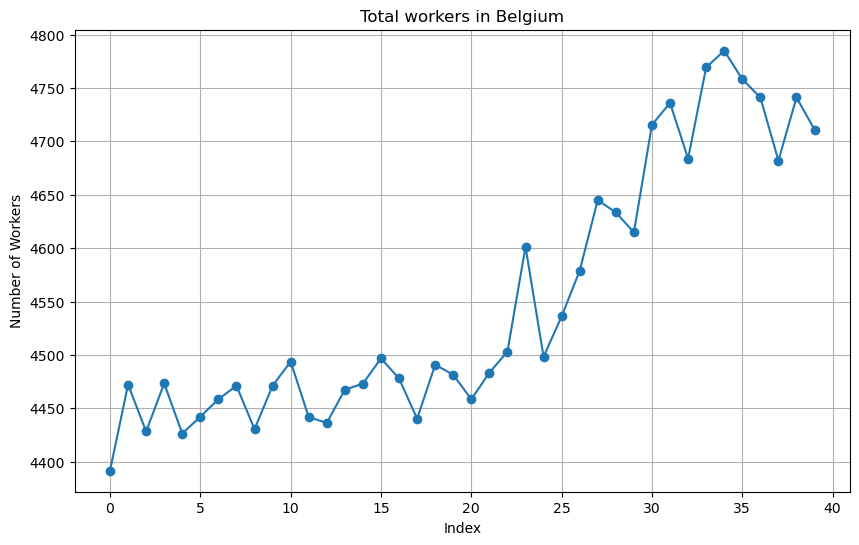

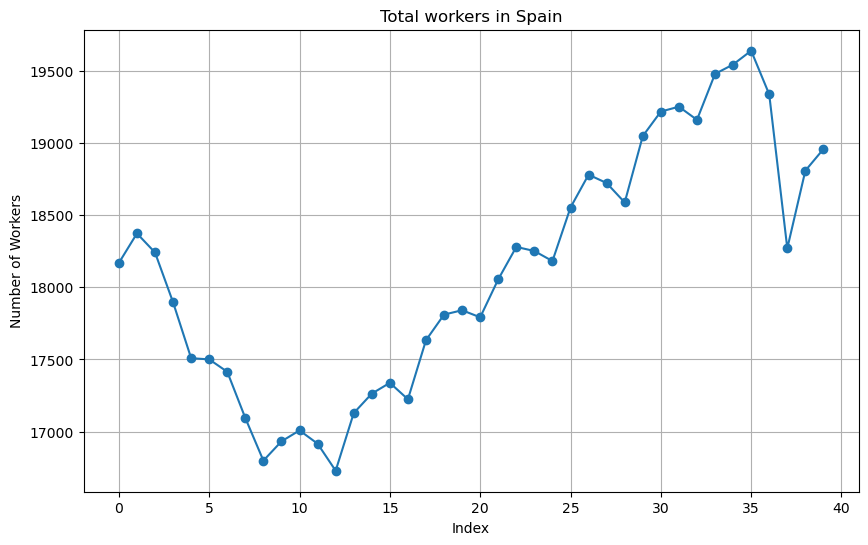

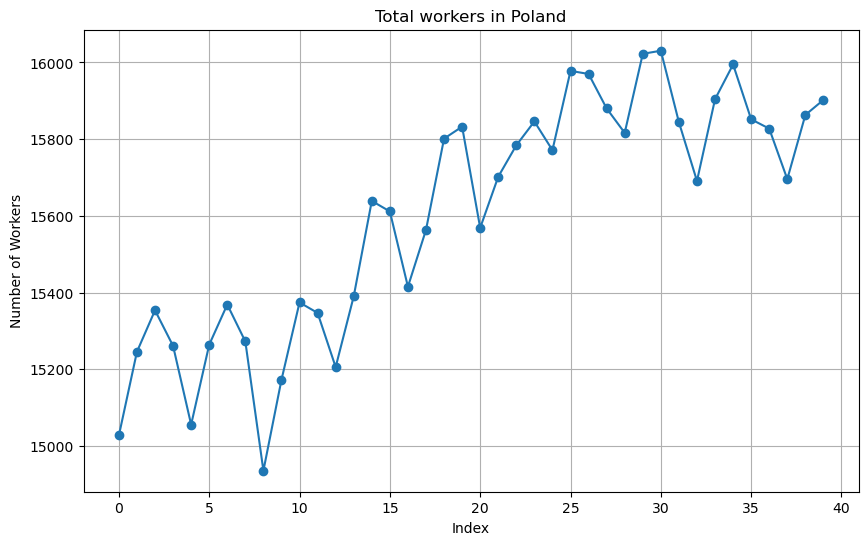

In [20]:
# Executing the main function
if __name__ == "__main__":
    main()